In [3]:
import torch

In [4]:
x = torch.rand(5,3)
print(x)

x1 = torch.tensor([1,2])
y = torch.tensor([3,4])
print(x1.add(y))
x1.add_(y)
print(x1)

tensor([[0.6338, 0.8976, 0.9895],
        [0.5531, 0.9686, 0.7872],
        [0.6185, 0.6924, 0.7859],
        [0.2135, 0.6696, 0.6612],
        [0.5428, 0.6092, 0.6334]])
tensor([4, 6])
tensor([4, 6])


##### 创建tensor

跟numpy类似

In [5]:
t1 = torch.Tensor([1,2,3,4,5,6])
print(t1)

t2 = torch.Tensor(2,3)
print(t2)

t = torch.Tensor([[1,2,3],[4,5,6]])
print(t.size())

t3 = torch.Tensor(1)
print(t3)

tensor([1., 2., 3., 4., 5., 6.])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])
tensor([7.0065e-45])


In [6]:
x = torch.randn(2,3)
print(x.shape, x.dim())

torch.Size([2, 3]) 2


##### 索引操作

In [7]:
torch.manual_seed(2024)
x  = torch.randn(2,3)
print(x, x[1,1], torch.masked_select(x, x>0), torch.nonzero(x))

tensor([[-0.0404,  1.7260, -0.8140],
        [ 1.3722,  0.5060, -0.4823]]) tensor(0.5060) tensor([1.7260, 1.3722, 0.5060]) tensor([[0, 0],
        [0, 1],
        [0, 2],
        [1, 0],
        [1, 1],
        [1, 2]])


##### 标量反向传播

In [8]:
x = torch.Tensor([2])
w = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)

y = torch.mul(w,x)
z = torch.add(y,b)
print(f'x,w,b的requires_grad为{x.requires_grad},{w.requires_grad},{b.requires_grad}')
print(f'y,z的requires_grad为{y.requires_grad},{z.requires_grad}')

print(f'{x.is_leaf},{y.is_leaf},{x.grad_fn},{y.grad_fn}')

z.backward()

print(f'{w.grad}')

x,w,b的requires_grad为False,True,True
y,z的requires_grad为True,True
True,False,None,<MulBackward0 object at 0x1204329b0>
tensor([2.])


##### 非标量反向传播


In [9]:
x = torch.tensor([[2,3]], dtype = torch.float, requires_grad=True)
j = torch.zeros(2,2)

y = torch.zeros(1,2)

y[0,0] = x[0,0] **2 + 3*x[0,1]
y[0,1] = x[0,1] **2 + 2*x[0,0]

print(x, y)

y.backward(torch.Tensor([[2,2]]))
print(x.grad)

tensor([[2., 3.]], requires_grad=True) tensor([[13., 13.]], grad_fn=<CopySlices>)
tensor([[12., 18.]])


##### 基于表达式y=3x**2+2 构建机器学习

In [12]:
from matplotlib import pyplot as plt
import numpy as np

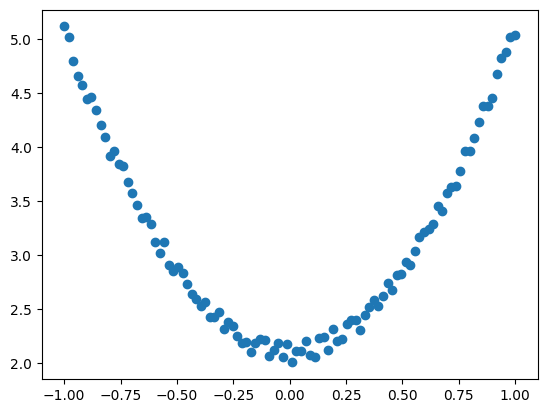

In [19]:
np.random.seed(2024)
x = np.linspace(-1,1,100).reshape(100,1)

y = 3*np.power(x,2) +2 + 0.2*np.random.rand(x.size).reshape(100,1)
plt.scatter(x,y)
plt.show()

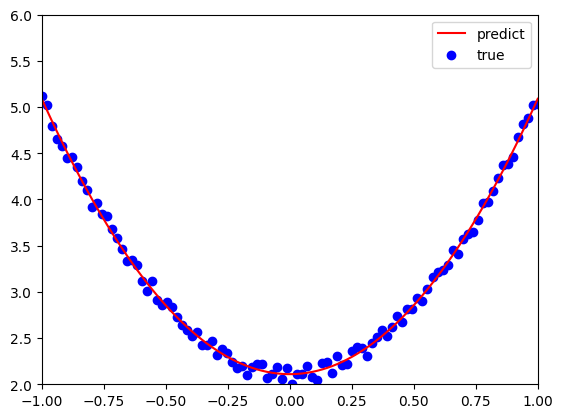

[[2.98039022]] [[2.10940584]]


In [20]:
w1 = np.random.rand(1,1)
b1 = np.random.rand(1,1)

lr = 0.001
for i in range(800):
    y_pred = np.power(x,2)*w1+b1
    loss = 0.5*(y_pred-y)**2
    loss = loss.sum()
    grad_w = np.sum((y_pred - y)*np.power(x,2))
    grad_b = np.sum((y_pred - y))
    w1 -= lr * grad_w
    b1 -= lr * grad_b

plt.plot(x,y_pred,'r-',label = 'predict')
plt.scatter(x, y,color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()
plt.show()
print(w1,b1)
    